>Predict Titanic Survivor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv(r'C:\Users\user\Desktop\python_machine_learning_guide\titanic\train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


>Data Check

In [2]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [4]:
titanic_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [5]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


>Data Preprocessing - Handle Null values

In [6]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('# of Null Value in titanic_df:\n', titanic_df.isnull().sum(), sep='')

# of Null Value in titanic_df:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [7]:
print('Distribution of Sex:\n', titanic_df['Sex'].value_counts(), sep='')
print('--------------------------')
print('Distribution of Cabin:\n', titanic_df['Cabin'].value_counts(), sep='')
print("# of values that 'Cabin' have:", titanic_df['Cabin'].value_counts().count())
print('--------------------------')
print('Distribution of Embarked:\n', titanic_df['Embarked'].value_counts(), sep='')


Distribution of Sex:
male      577
female    314
Name: Sex, dtype: int64
--------------------------
Distribution of Cabin:
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
# of values that 'Cabin' have: 148
--------------------------
Distribution of Embarked:
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [8]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head(10)

0    N
1    C
2    N
3    C
4    N
5    N
6    E
7    N
8    N
9    N
Name: Cabin, dtype: object

>Data Analysis by Seaborn

In [9]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

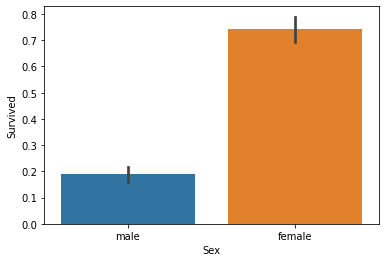

In [10]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

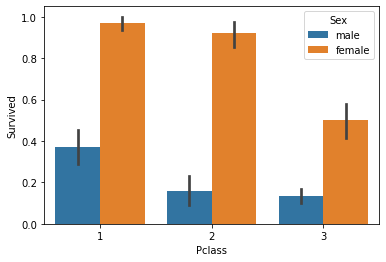

In [11]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

<AxesSubplot:xlabel='Age_Class', ylabel='Survived'>

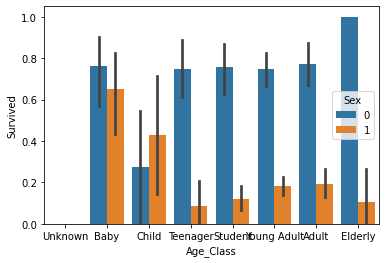

In [19]:
def age_class(age):
    if age < 0:
        ageclass = 'Unkown'
    elif age <=5:
        ageclass = 'Baby'
    elif age <=12:
        ageclass = 'Child'
    elif age <=18:
        ageclass = 'Teenager'
    elif age <=25:
        ageclass = 'Student'
    elif age <=35:
        ageclass = 'Young Adult'
    elif age <=60:
        ageclass = 'Adult'
    elif age >60:
        ageclass = 'Elderly'
    return ageclass

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_Class'] = titanic_df['Age'].apply(lambda x: age_class(x))
sns.barplot(x='Age_Class', y='Survived', hue='Sex', data=titanic_df, order=group_names)
# titanic_df.drop(axis=1, columns='Age_Class', inplace=True)

In [20]:
titanic_df['Age_Class'].value_counts()

Young Adult    373
Adult          195
Student        162
Teenager        70
Baby            44
Child           25
Elderly         22
Name: Age_Class, dtype: int64

>Data Preprocessing - Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
'''
def select_object_features(df):
    features = df.columns.values.tolist()
    obj_features = []
    for col in features:
        if type(df.loc[0, col]) == str:
            obj_features.append(col)
        else:
            continue
    return obj_features

select_object_features(titanic_df)
#result: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']   
'''

def encode_features(df, feature_names):
    label_encoder = LabelEncoder()
    for feature in feature_names:
        label_encoder.fit(df[feature])
        df[feature] = label_encoder.transform(df[feature])
    return df

titanic_df = encode_features(titanic_df, ['Sex','Cabin','Embarked'])
titanic_df[['Sex','Cabin','Embarked']].head(10)


,Sex,Cabin,Embarked
0,1,7,3
1,0,2,0
2,0,7,3
3,0,2,3
4,1,7,3
5,1,7,2
6,1,4,3
7,1,7,3
8,0,7,3
9,0,7,0


In [15]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,7,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,4,3
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,7,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,7,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,7,0


>One-Click Data Preprocessing

In [27]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df


def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df


def label_encoding(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
    return df


def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = label_encoding(df)
    return df


In [29]:
titanic_df = pd.read_csv(r'C:\Users\user\Desktop\python_machine_learning_guide\titanic\train.csv')
target = titanic_df['Survived']
data = titanic_df.drop('Survived', axis = 1)
data = transform_features(data)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=11)


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

DT_clf = DecisionTreeClassifier(random_state=11)
RF_clf = RandomForestClassifier(random_state=11)
LogReg = LogisticRegression(random_state=11)

DT_clf.fit(X_train, Y_train)
DT_pred = DT_clf.predict(X_test)
DT_score = accuracy_score(DT_pred, Y_test)
print('Accuracy Score of DecisionTreeClassifier:', DT_score)

RF_clf.fit(X_train, Y_train)
RF_pred = RF_clf.predict(X_test)
RF_score = accuracy_score(RF_pred, Y_test)
print('Accuracy Score of RandomForestClassifier:', RF_score)

LogReg.fit(X_train, Y_train)
LG_pred = LogReg.predict(X_test)
LG_score = accuracy_score(LG_pred, Y_test)
print('Accuracy Score of LogisitcRegression:', LG_score)

Accuracy Score of DecisionTreeClassifier: 0.7877094972067039
Accuracy Score of RandomForestClassifier: 0.8547486033519553
Accuracy Score of LogisitcRegression: 0.8491620111731844


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.model_selection import KFold

def exec_KFold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    n_iter = 0
    for train_index, test_index in kfold.split(data):
        n_iter += 1
        X_train, X_test = data.values[train_index], data.values[test_index]
        Y_train, Y_test = target.values[train_index], target.values[test_index]

        clf.fit(X_train, Y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(pred, Y_test)
        print('#{}/Cross Validation Accuracy: {}'.format(n_iter, accuracy))
        scores.append(accuracy)
        
    print('Average of Cross Validation Accuraacy:', np.mean(scores))
    
exec_KFold(DT_clf)

#1/Cross Validation Accuracy: 0.7541899441340782
#2/Cross Validation Accuracy: 0.7808988764044944
#3/Cross Validation Accuracy: 0.7865168539325843
#4/Cross Validation Accuracy: 0.7696629213483146
#5/Cross Validation Accuracy: 0.8202247191011236
Average of Cross Validation Accuraacy: 0.782298662984119


In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DT_clf, data, y=target, scoring='accuracy', cv=5)
print('Cross Validation Accuracy:', np.round(scores, 4))
print('Mean Accuracy:', np.round(np.mean(scores), 4))

Cross Validation Accuracy: [0.743  0.7753 0.7921 0.7865 0.8427]
Mean Accuracy: 0.7879


In [35]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
            'min_samples_split':[2,3,5],
            'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(DT_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, Y_train)

print('GridSearchCV Optimal Hyperparameter:', grid_dclf.best_params_)
print('GridSearchCV Highest Accuracy:', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_
prediction = best_dclf.predict(X_test)
accuracy = accuracy_score(prediction, Y_test)
print('Test accuracy using best_estimator:', accuracy)


GridSearchCV Optimal Hyperparameter: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV Highest Accuracy: 0.7991825076332119
Test accuracy using best_estimator: 0.8715083798882681
